In [155]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

In [136]:
df = pd.read_csv('FIFA_2018_Statistics.csv')
df = df.reset_index()
df

,index,Date,Team,Opponent,Goal Scored,Ball Possession %,Attempts,On-Target,Off-Target,Blocked,...,Yellow Card,Yellow & Red,Red,Man of the Match,1st Goal,Round,PSO,Goals in PSO,Own goals,Own goal Time
0,0,14-06-2018,Russia,Saudi Arabia,5,40,13,7,3,3,...,0,0,0,Yes,12.0,Group Stage,No,0,NaN,NaN
1,1,14-06-2018,Saudi Arabia,Russia,0,60,6,0,3,3,...,0,0,0,No,NaN,Group Stage,No,0,NaN,NaN
2,2,15-06-2018,Egypt,Uruguay,0,43,8,3,3,2,...,2,0,0,No,NaN,Group Stage,No,0,NaN,NaN
3,3,15-06-2018,Uruguay,Egypt,1,57,14,4,6,4,...,0,0,0,Yes,89.0,Group Stage,No,0,NaN,NaN
4,4,15-06-2018,Morocco,Iran,0,64,13,3,6,4,...,1,0,0,No,NaN,Group Stage,No,0,1.0,90.0
5,5,15-06-2018,Iran,Morocco,1,36,8,2,5,1,...,3,0,0,Yes,90.0,Group Stage,No,0,NaN,NaN
6,6,15-06-2018,Portugal,Spain,3,39,8,3,2,3,...,1,0,0,No,4.0,Group Stage,No,0,NaN,NaN
7,7,15-06-2018,Spain,Portugal,3,61,12,5,5,2,...,1,0,0,Yes,24.0,Group Stage,No,0,NaN,NaN
8,8,16-06-2018,France,Australia,2,51,12,5,4,3,...,1,0,0,Yes,58.0,Group Stage,No,0,NaN,NaN
9,9,16-06-2018,Australia,France,1,49,4,1,2,1,...,3,0,0,No,62.0,Group Stage,No,0,1.0,81.0


In [5]:
percent_missing = (df.isnull().sum() * 100 / len(df)).round(2)
missing_value_df = pd.DataFrame({'percent_missing': percent_missing})
missing_value_df.sort_values('percent_missing', ascending=False, inplace=True)
missing_value_df

,percent_missing
Own goal Time,90.62
Own goals,90.62
1st Goal,26.56
Passes,0.00
Goals in PSO,0.00
PSO,0.00
Round,0.00
Man of the Match,0.00
Red,0.00
Yellow & Red,0.00


Based on the observation of NaN data value, we further explore distribution of Man of the match based on 1st goal.

In [24]:
#df[df['1st Goal'].isnull()]
df[(df['Man of the Match']=='Yes') & (df['1st Goal'].isnull())]

,Date,Team,Opponent,Goal Scored,Ball Possession %,Attempts,On-Target,Off-Target,Blocked,Corners,...,Yellow Card,Yellow & Red,Red,Man of the Match,1st Goal,Round,PSO,Goals in PSO,Own goals,Own goal Time
18,17-06-2018,Germany,Mexico,0,60,25,9,9,7,8,...,2,0,0,Yes,NaN,Group Stage,No,0,NaN,NaN
73,26-06-2018,France,Denmark,0,62,11,4,6,1,2,...,0,0,0,Yes,NaN,Group Stage,No,0,NaN,NaN


Out of 64 matches, only 2 matches have Man of the Match where the team has not scored any goals.
We now clean the dataset to proceed with exploration.

In [137]:
df['Man of the Match'] = df['Man of the Match'].map({'Yes': 1, 'No': 0})
df['PSO'] = df['PSO'].map({'Yes': 1, 'No': 0})
df = df.fillna(-1)

In [138]:
x=tuple(df['Date'].unique())
d={}
for i,j in enumerate(x):
    print(i,j)
    d.update({j:(i+1)})
df['Date'] = df['Date'].map(d)
df

0 14-06-2018
1 15-06-2018
2 16-06-2018
3 17-06-2018
4 18-06-2018
5 19-06-2018
6 20-06-2018
7 21-06-2018
8 22-06-2018
9 23-06-2018
10 24-06-2018
11 25-06-2018
12 26-06-2018
13 27-06-2018
14 28-06-2018
15 30-06-2018
16 01-07-2018
17 02-07-2018
18 03-07-2018
19 06-07-2018
20 07-07-2018
21 10-07-2018
22 11-07-2018
23 14-07-2018
24 15-07-2018


,index,Date,Team,Opponent,Goal Scored,Ball Possession %,Attempts,On-Target,Off-Target,Blocked,...,Yellow Card,Yellow & Red,Red,Man of the Match,1st Goal,Round,PSO,Goals in PSO,Own goals,Own goal Time
0,0,1,Russia,Saudi Arabia,5,40,13,7,3,3,...,0,0,0,1,12.0,Group Stage,0,0,-1.0,-1.0
1,1,1,Saudi Arabia,Russia,0,60,6,0,3,3,...,0,0,0,0,-1.0,Group Stage,0,0,-1.0,-1.0
2,2,2,Egypt,Uruguay,0,43,8,3,3,2,...,2,0,0,0,-1.0,Group Stage,0,0,-1.0,-1.0
3,3,2,Uruguay,Egypt,1,57,14,4,6,4,...,0,0,0,1,89.0,Group Stage,0,0,-1.0,-1.0
4,4,2,Morocco,Iran,0,64,13,3,6,4,...,1,0,0,0,-1.0,Group Stage,0,0,1.0,90.0
5,5,2,Iran,Morocco,1,36,8,2,5,1,...,3,0,0,1,90.0,Group Stage,0,0,-1.0,-1.0
6,6,2,Portugal,Spain,3,39,8,3,2,3,...,1,0,0,0,4.0,Group Stage,0,0,-1.0,-1.0
7,7,2,Spain,Portugal,3,61,12,5,5,2,...,1,0,0,1,24.0,Group Stage,0,0,-1.0,-1.0
8,8,3,France,Australia,2,51,12,5,4,3,...,1,0,0,1,58.0,Group Stage,0,0,-1.0,-1.0
9,9,3,Australia,France,1,49,4,1,2,1,...,3,0,0,0,62.0,Group Stage,0,0,1.0,81.0


In [141]:
x=tuple(df['Team'].unique())
d={}
for i,j in enumerate(x):
    print(i,j)
    d.update({j:(i+1)})
print(d)
df['Team'] = df['Team'].map(d)
df['Opponent'] = df['Opponent'].map(d)
df

0 Russia
1 Saudi Arabia
2 Egypt
3 Uruguay
4 Morocco
5 Iran
6 Portugal
7 Spain
8 France
9 Australia
10 Argentina
11 Iceland
12 Peru
13 Denmark
14 Croatia
15 Nigeria
16 Costa Rica
17 Serbia
18 Germany
19 Mexico
20 Brazil
21 Switzerland
22 Sweden
23 Korea Republic
24 Belgium
25 Panama
26 Tunisia
27 England
28 Colombia
29 Japan
30 Poland
31 Senegal
{'Russia': 1, 'Saudi Arabia': 2, 'Egypt': 3, 'Uruguay': 4, 'Morocco': 5, 'Iran': 6, 'Portugal': 7, 'Spain': 8, 'France': 9, 'Australia': 10, 'Argentina': 11, 'Iceland': 12, 'Peru': 13, 'Denmark': 14, 'Croatia': 15, 'Nigeria': 16, 'Costa Rica': 17, 'Serbia': 18, 'Germany': 19, 'Mexico': 20, 'Brazil': 21, 'Switzerland': 22, 'Sweden': 23, 'Korea Republic': 24, 'Belgium': 25, 'Panama': 26, 'Tunisia': 27, 'England': 28, 'Colombia': 29, 'Japan': 30, 'Poland': 31, 'Senegal': 32}


,index,Date,Team,Opponent,Goal Scored,Ball Possession %,Attempts,On-Target,Off-Target,Blocked,...,Yellow Card,Yellow & Red,Red,Man of the Match,1st Goal,Round,PSO,Goals in PSO,Own goals,Own goal Time
0,0,1,1,2,5,40,13,7,3,3,...,0,0,0,1,12.0,Group Stage,0,0,-1.0,-1.0
1,1,1,2,1,0,60,6,0,3,3,...,0,0,0,0,-1.0,Group Stage,0,0,-1.0,-1.0
2,2,2,3,4,0,43,8,3,3,2,...,2,0,0,0,-1.0,Group Stage,0,0,-1.0,-1.0
3,3,2,4,3,1,57,14,4,6,4,...,0,0,0,1,89.0,Group Stage,0,0,-1.0,-1.0
4,4,2,5,6,0,64,13,3,6,4,...,1,0,0,0,-1.0,Group Stage,0,0,1.0,90.0
5,5,2,6,5,1,36,8,2,5,1,...,3,0,0,1,90.0,Group Stage,0,0,-1.0,-1.0
6,6,2,7,8,3,39,8,3,2,3,...,1,0,0,0,4.0,Group Stage,0,0,-1.0,-1.0
7,7,2,8,7,3,61,12,5,5,2,...,1,0,0,1,24.0,Group Stage,0,0,-1.0,-1.0
8,8,3,9,10,2,51,12,5,4,3,...,1,0,0,1,58.0,Group Stage,0,0,-1.0,-1.0
9,9,3,10,9,1,49,4,1,2,1,...,3,0,0,0,62.0,Group Stage,0,0,1.0,81.0


In [142]:
x=tuple(df['Round'].unique())
d={}
for i,j in enumerate(x):
    print(i,j)
    d.update({j:(i+1)})
print(d)
df['Round'] = df['Round'].map(d)
df

0 Group Stage
1 Round of 16
2 Quarter Finals
3 Semi- Finals
4 3rd Place
5 Final
{'Group Stage': 1, 'Round of 16': 2, 'Quarter Finals': 3, 'Semi- Finals': 4, '3rd Place': 5, 'Final': 6}


,index,Date,Team,Opponent,Goal Scored,Ball Possession %,Attempts,On-Target,Off-Target,Blocked,...,Yellow Card,Yellow & Red,Red,Man of the Match,1st Goal,Round,PSO,Goals in PSO,Own goals,Own goal Time
0,0,1,1,2,5,40,13,7,3,3,...,0,0,0,1,12.0,1,0,0,-1.0,-1.0
1,1,1,2,1,0,60,6,0,3,3,...,0,0,0,0,-1.0,1,0,0,-1.0,-1.0
2,2,2,3,4,0,43,8,3,3,2,...,2,0,0,0,-1.0,1,0,0,-1.0,-1.0
3,3,2,4,3,1,57,14,4,6,4,...,0,0,0,1,89.0,1,0,0,-1.0,-1.0
4,4,2,5,6,0,64,13,3,6,4,...,1,0,0,0,-1.0,1,0,0,1.0,90.0
5,5,2,6,5,1,36,8,2,5,1,...,3,0,0,1,90.0,1,0,0,-1.0,-1.0
6,6,2,7,8,3,39,8,3,2,3,...,1,0,0,0,4.0,1,0,0,-1.0,-1.0
7,7,2,8,7,3,61,12,5,5,2,...,1,0,0,1,24.0,1,0,0,-1.0,-1.0
8,8,3,9,10,2,51,12,5,4,3,...,1,0,0,1,58.0,1,0,0,-1.0,-1.0
9,9,3,10,9,1,49,4,1,2,1,...,3,0,0,0,62.0,1,0,0,1.0,81.0


In [143]:
#numerical_features   = df.select_dtypes(include = [np.number]).columns
x1=tuple(df.iloc[18])
x2=tuple(df.iloc[19])
print(x1)
print(x2)
print(len(x2))

(18.0, 4.0, 19.0, 20.0, 0.0, 60.0, 25.0, 9.0, 9.0, 7.0, 8.0, 1.0, 17.0, 3.0, 88.0, 595.0, 110.0, 10.0, 2.0, 0.0, 0.0, 1.0, -1.0, 1.0, 0.0, 0.0, -1.0, -1.0)
(19.0, 4.0, 20.0, 19.0, 1.0, 40.0, 12.0, 4.0, 6.0, 2.0, 1.0, 2.0, 11.0, 9.0, 82.0, 281.0, 106.0, 15.0, 2.0, 0.0, 0.0, 0.0, 35.0, 1.0, 0.0, 0.0, -1.0, -1.0)
28


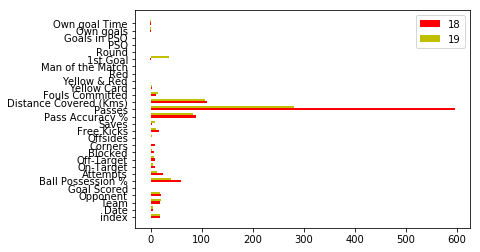

In [151]:
N = len(list(df.columns.values))

fig, ax = plt.subplots()

ind = np.arange(N)    # the x locations for the groups
width = 0.3         # the width of the bars
p1 = ax.barh(ind, x1, width, color='r')

p2 = ax.barh(ind + width, x2, width,
            color='y')

x = list(df.columns.values)
x_pos = [i for i, _ in enumerate(x)]
plt.yticks(x_pos, x)

ax.legend((p1[0], p2[0]), ('18', '19'))
#ax.autoscale_view()

plt.show()

In [152]:
x1=tuple(df.iloc[72])
x2=tuple(df.iloc[73])
print(x1)
print(x2)
print(len(x2))

(72.0, 13.0, 14.0, 9.0, 0.0, 38.0, 5.0, 1.0, 2.0, 2.0, 4.0, 1.0, 11.0, 4.0, 72.0, 305.0, 106.0, 10.0, 1.0, 0.0, 0.0, 0.0, -1.0, 1.0, 0.0, 0.0, -1.0, -1.0)
(73.0, 13.0, 9.0, 14.0, 0.0, 62.0, 11.0, 4.0, 6.0, 1.0, 2.0, 1.0, 11.0, 1.0, 87.0, 669.0, 104.0, 10.0, 0.0, 0.0, 0.0, 1.0, -1.0, 1.0, 0.0, 0.0, -1.0, -1.0)
28


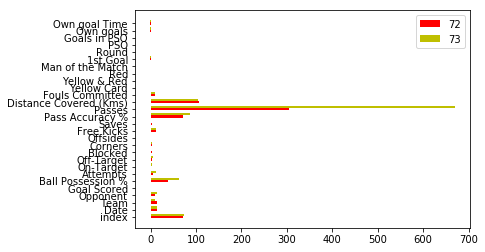

<Figure size 2160x720 with 0 Axes>

In [157]:
N = len(list(df.columns.values))

fig, ax = plt.subplots()

ind = np.arange(N)    # the x locations for the groups
width = 0.3         # the width of the bars
p1 = ax.barh(ind, x1, width, color='r')

p2 = ax.barh(ind + width, x2, width,
            color='y')

x = list(df.columns.values)
x_pos = [i for i, _ in enumerate(x)]
plt.yticks(x_pos, x)

ax.legend((p1[0], p2[0]), ('72', '73'))
#ax.autoscale_view()
plt.figure(figsize=(30,10))


plt.show()

Further checking the match details, we observe the teams with man of the match have higher 'Ball Possession %'

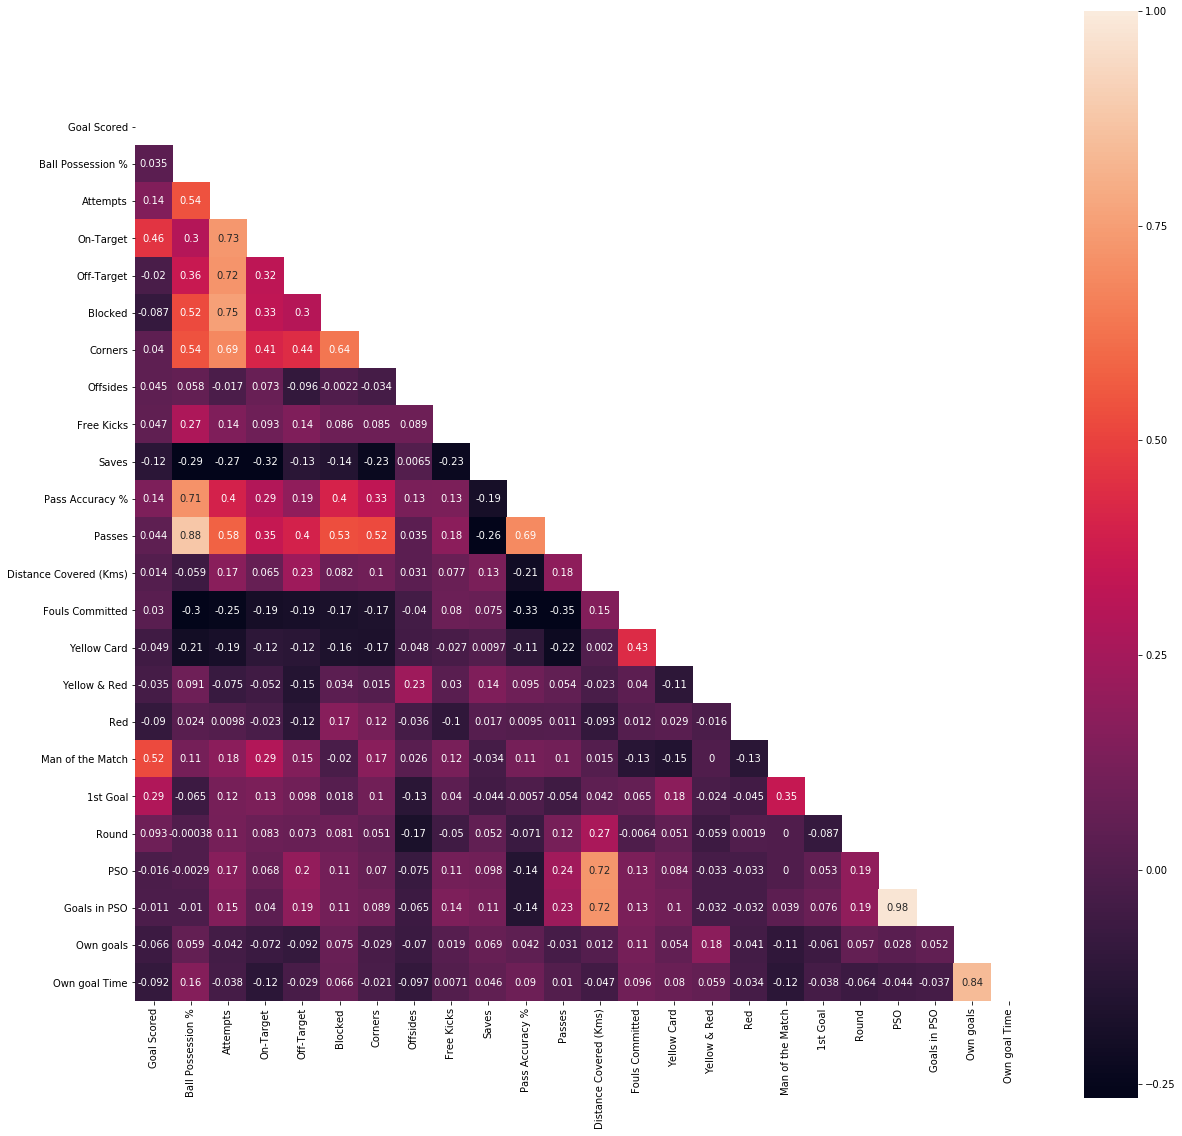

In [173]:
dropset = ['index','Date', 'Team','Opponent']
data = df.drop(dropset,axis=1)
mask = np.zeros_like(data.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(), mask=mask,square=True, annot=True,robust=True, yticklabels=1)

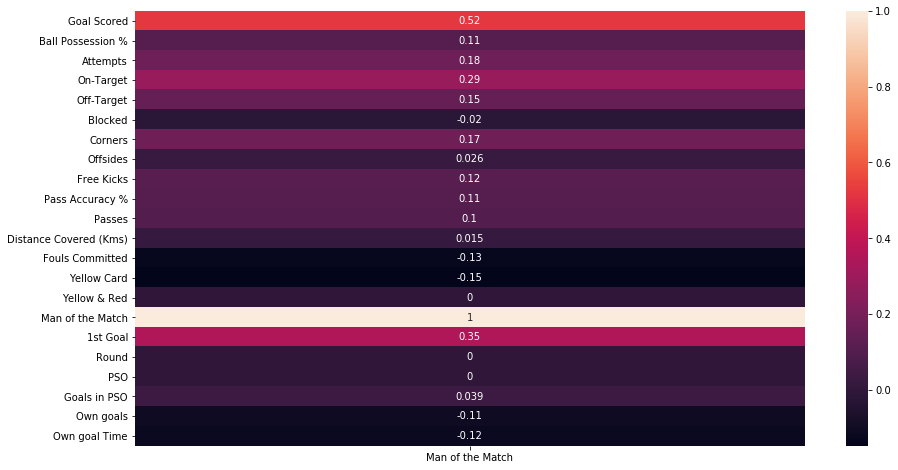

In [196]:
dropset = ['Saves', 'Red']
data1 = data.drop(dropset,axis=1)
corr = data1.corr()
corr = corr.filter(items = ['Man of the Match'])
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True)

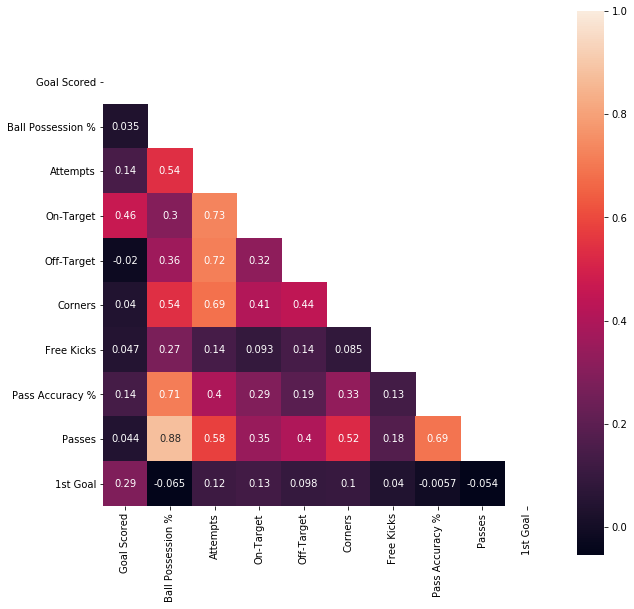

In [197]:
dropset = ['Man of the Match','Own goal Time', 'Own goals','Goals in PSO','PSO','Round', 'Yellow & Red', 'Yellow Card', 'Fouls Committed', 'Distance Covered (Kms)','Offsides','Blocked']
data2 = data1.drop(dropset,axis=1)
mask = np.zeros_like(data2.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(10,10))
sns.heatmap(data2.corr(), mask=mask,square=True, annot=True,robust=True, yticklabels=1)

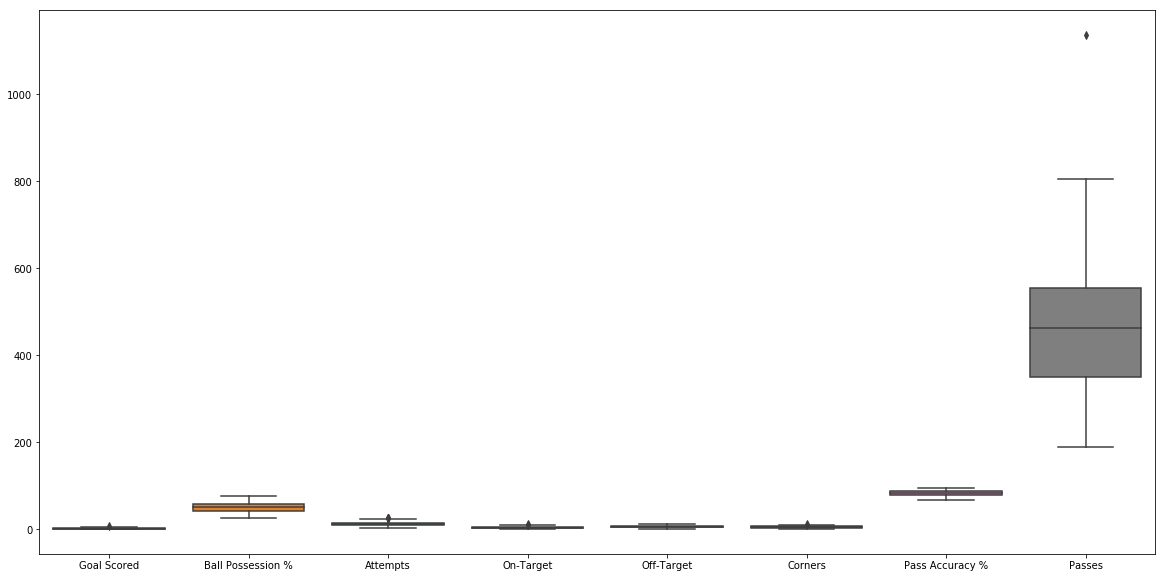

In [198]:
dropset = ['Free Kicks','1st Goal']
data3 = data2.drop(dropset,axis=1)
plt.figure(figsize=(20,10))
sns.boxplot(data = data3)
plt.show()

In [227]:
def grubbs_test(data):
    import math
    a = 0.05
    N = data.shape[0]
    #print(N)
    p = 1-(a/(2*N))
    nn = N-2
    value = stats.t.ppf(p, nn)
    #print(value)
    value**=2
    #print(value)
    thresh = math.sqrt(value/(nn*value)) * (N-1)/math.sqrt(N)
    #print(thresh)
    y = data

    term_factor_max = 0
    term_factor_min = 0
    mean = y.mean()
    std = y.std()
    mean_dev = abs(y-mean)
    for i in range(N):

        y_max = mean_dev.idxmax()
        y_min = mean_dev.idxmin()
        if y_max == term_factor_max and y_min == term_factor_min:
            break
        term_factor_max = y_max
        term_factor_min = y_min
        G1 = abs(mean_dev[y_min])/std
        G2 = abs(mean_dev[y_max])/std
        if G1>thresh:
            mean_dev = mean_dev[mean_dev != mean_dev[y_min]]
            y = y[y != y[y_min]]
        if G2>thresh:
            mean_dev = mean_dev[mean_dev != mean_dev[y_max]]
            y = y[y != y[y_max]]
        #print(i, thresh, G1, y_min, G2, y_max)
    p = stats.t.cdf(value, nn)
    return y

In [258]:
def IQR(data):

    IQR = Q3 - Q1
    return IQR

In [285]:
def boxplot_outlier(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    iqr = stats.iqr(data)#IQR(data)
    data = data[(data>(Q1-1.5*iqr)) & (data<(Q3+1.5*iqr))]
    return data

In [286]:
y = boxplot_outlier(df['Goal Scored'])
print(y.shape[0])
y = grubbs_test(df['Goal Scored'])
print(y.shape[0])

125
80


In [287]:
y = boxplot_outlier(df['Ball Possession %'])
print(y.shape[0])
y = grubbs_test(df['Ball Possession %'])
print(y.shape[0])

128
88


In [288]:
y = boxplot_outlier(df['Attempts'])
print(y.shape[0])
y = grubbs_test(df['Attempts'])
print(y.shape[0])

122
92


In [289]:
y = boxplot_outlier(df['On-Target'])
print(y.shape[0])
y = grubbs_test(df['On-Target'])
print(y.shape[0])

126
95


In [290]:
y = boxplot_outlier(df['Off-Target'])
print(y.shape[0])
y = grubbs_test(df['Off-Target'])
print(y.shape[0])

128
90


In [291]:
y = boxplot_outlier(df['Corners'])
print(y.shape[0])
y = grubbs_test(df['Corners'])
print(y.shape[0])

127
85


In [292]:
y = boxplot_outlier(df['Pass Accuracy %'])
print(y.shape[0])
y = grubbs_test(df['Pass Accuracy %'])
print(y.shape[0])

125
93


In [293]:
y = boxplot_outlier(df['Passes'])
print(y.shape[0])
y = grubbs_test(df['Passes'])
print(y.shape[0])

127
88
